# Dataset Census
## Importanção da biblioteas necessarias
importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

### Ler dataset

In [2]:
base = pd.read_csv('../dataset/census.csv')

Previa das 3 primeira linha da base de dados

In [89]:
base.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [90]:
base.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
base.shape

(32561, 15)

## Relação entre o salario e a quntidade de trabalhadores

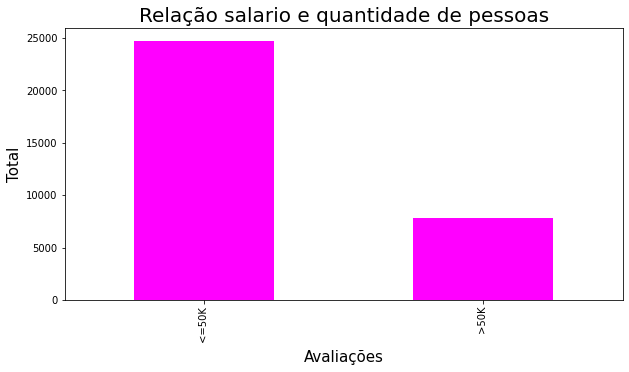

In [3]:
base['income'].value_counts().plot.bar(color = 'magenta',figsize=(10, 5))
plt.title('Relação salario e quantidade de pessoas', fontsize=20)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

Como vemos a maior parte das pessoas do dataset recebe <=50k

## Relação entre o sexo e a quantidade de trabalhadores.

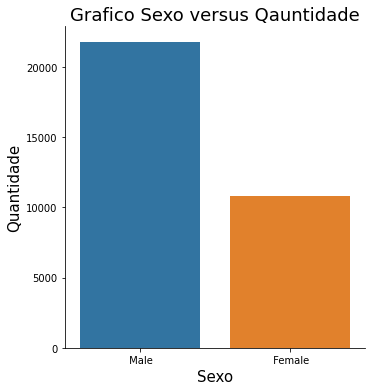

In [4]:
sns.catplot(x= 'sex', kind="count", data=base)
plt.title('Grafico Sexo versus Qauntidade',fontsize=18)
plt.xlabel('Sexo',fontsize=15)
plt.ylabel('Quantidade',fontsize=15)
plt.show()

A maior parte dos trabalhadores é do sexo masculino

## Verificação do sexo que ganha salario mais alto
### Primeiro vamos contar a quantidade de homens e de mulheres. Vamos armazenar a quantidade de homens
### na variavel men, e a quantidade de mulheres na variavel women.
### Precisamos tambem da quantida de homens que ganham mais que >50K  tambem da quantidade de mulher
### vamos armezebar em men_maior50 e women_maoir50, respectivamente

In [78]:
men = base[(base.sex==' Male')].count()[0]
women = base[(base.sex==' Female')].count()[0]
men_maior50 = base[(base.sex==' Male') & (base.income==' >50K')].count()[0]
women_maior50 = base[(base.sex==' Female') & (base.income==' >50K')].count()[0]

In [79]:
base[base['income']==' >50K'].count()[0]

7841

In [80]:
base[base['income']==' <=50K'].count()[0]

24720

### Pouco mais de 10% das mulheres recebem >50K

In [99]:
[women_maior50/women]

[0.10946058861758426]

### Quanto aos homens mais de 30% dos homens recebem salarios maiors que >50K

In [100]:
[men_maior50/men]

[0.3057365764111978]

In [101]:
m1 = np.array([men - men_maior50,men_maior50])/men
m2 = np.array([women - women_maior50,women_maior50])/women
p = pd.DataFrame([m1,m2],index=['Homem','Mulher'],columns=['Ganhado <=50K ','Ganhando >50k'])

In [102]:
p

,Ganhado <=50K,Ganhando >50k
Homem,0.694263,0.305737
Mulher,0.890539,0.109461


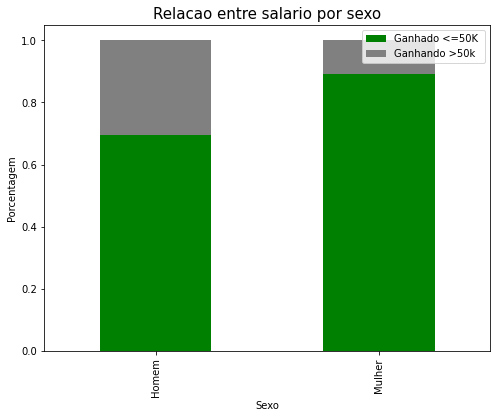

In [103]:
p.plot(kind = 'bar',
        stacked = True,
        figsize=(8,6),
        color = ['green','gray']
)
plt.title('Relacao entre salario por sexo',fontsize=15)
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')        
plt.show()

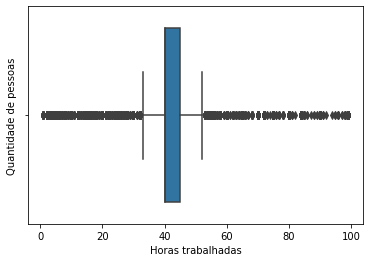

In [88]:
sns.boxplot(x=base["hour-per-week"])
plt.xlabel('Horas trabalhadas')
plt.ylabel('Quantidade de pessoas')        
plt.show()

In [7]:
previsores = base.iloc[:,0:14].values
classe = base.iloc[:,14].values

In [151]:
encoder = LabelEncoder()
previsores[:,1] = encoder.fit_transform(previsores[:,1])
previsores[:,3] = encoder.fit_transform(previsores[:,3])
previsores[:,5] = encoder.fit_transform(previsores[:,5])
previsores[:,6] = encoder.fit_transform(previsores[:,6])
previsores[:,7] = encoder.fit_transform(previsores[:,7])
previsores[:,8] = encoder.fit_transform(previsores[:,8])
previsores[:,9] = encoder.fit_transform(previsores[:,9])
previsores[:,13] = encoder.fit_transform(previsores[:,13])

In [152]:
#com isso apresenta resultados ruim
#onehot = OneHotEncoder()
#previsores = onehot.fit_transform(previsores).toarray()

In [153]:
#classe = classe.reshape(-1,1)
enc_cla = LabelEncoder()
classe = enc_cla.fit_transform(classe)

In [154]:
le_name_mapping = dict(zip(enc_cla.classes_, enc_cla.transform(enc_cla.classes_)))
le_name_mapping

{' <=50K': 0, ' >50K': 1}

In [155]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [156]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [157]:
clf = RandomForestClassifier(n_estimators=50,random_state=0,criterion='gini')
clf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=50, random_state=0)

In [158]:
pred = clf.predict(xtest)

In [159]:
accuracy_score(ytest,pred)

0.8590511285122063

In [160]:
matrix = confusion_matrix(ytest,pred)

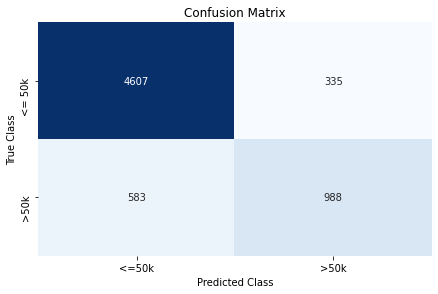

In [161]:
dataframe = pd.DataFrame(matrix, index=['<= 50k','>50k'], columns=['<=50k','>50k'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()